In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
%matplotlib inline

In [2]:
df = loadmat("./ex5/ex5data1.mat")

In [3]:
X, Xtest, Xval = df['X'], df['Xtest'], df['Xval']
y, ytest, yval = df['y'], df['ytest'], df['yval']

## Regularized Linear Regression

### Visualizing the dataset

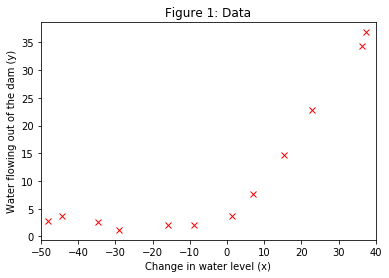

In [4]:
plt.figure(figsize=(6,4))
plt.plot(X, y, 'rx')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlim(-50, 40)
plt.title('Figure 1: Data')
plt.show()

### Regularized linear regression cost function and gradient

In [5]:
def linearRegCostFunction(theta, x, y, Lambda):
    m = x.shape[0]
    x = np.c_[np.ones([m, 1]), x]
    res = np.dot(x, theta) - y.ravel()
    cost = (1 / (2*m)) * (np.dot(res.T, res) + Lambda * np.dot(theta[1:].T, theta[1:]))
    grad = (1 / m) * np.dot(res.T, x)
    grad[1:] += (Lambda / m) * theta[1:] 
    return (cost, grad)

In [6]:
theta0 = np.array([1, 1])
print("Initial Cost: ", linearRegCostFunction(theta0, X, y, 1)[0])
print("Initial Gradient: ", linearRegCostFunction(theta0, X, y, 1)[1])

Initial Cost:  303.99319222
Initial Gradient:  [ -15.30301567  598.25074417]


### Fitting linear regression

In [7]:
def trainLinearReg(CostFunction, x, y, Lambda):
    costFunc = lambda p: CostFunction(p, x, y, Lambda)[0]
    gradFunc = lambda p: CostFunction(p, x, y, Lambda)[1]
    theta = np.zeros([x.shape[1] + 1,])
    result = minimize(costFunc, x0 = theta, method = 'CG', jac = gradFunc, options={'disp':False, 'maxiter': 200})
    return result.x

Fitted Parameters:  [ 13.08790351   0.36777923]


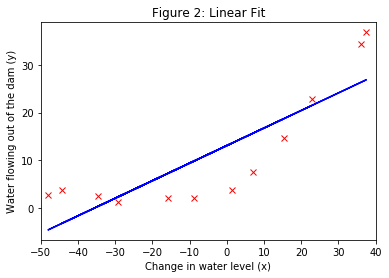

In [8]:
theta1 = trainLinearReg(linearRegCostFunction, X, y, 0)
print("Fitted Parameters: ", theta1)
fit_y = theta1[0] + theta1[1] * X

plt.figure(figsize=(6,4))
plt.plot(X, y, 'rx', X, fit_y, 'b-')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlim(-50, 40)
plt.title('Figure 2: Linear Fit')
plt.show()

## Bias-variance

### Learning curves

In [9]:
def learningCurve(x_train, y_train, x_val, y_val, Lambda):
    error_train = []
    error_val = []
    for i in range(1, x_train.shape[0]+1):
        p = trainLinearReg(linearRegCostFunction, x_train[:i], y_train[:i], Lambda)
        error_train.append(linearRegCostFunction(p, x_train[:i], y_train[:i], 0)[0])
        error_val.append(linearRegCostFunction(p, x_val, y_val, 0)[0])
    return (error_train, error_val)

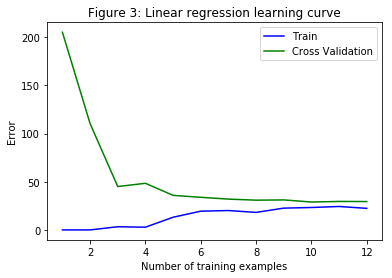

In [10]:
err_train, err_val = learningCurve(X, y, Xval, yval, 0)

plt.figure(figsize=(6,4))
xax3 = list(range(1, 13))
plt.plot(xax3, err_train, 'b-', label='Train')
plt.plot(xax3, err_val, 'g-', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Figure 3: Linear regression learning curve')
plt.legend(loc='upper right')
plt.show()

## Polynomial regression

In [11]:
def polyFeatures(x, power):
    X_poly = x[:]
    if power == 1:
        return X_poly
    for p in range(2, power + 1):
        X_poly = np.c_[X_poly, x ** p]
    return X_poly

### Learning Polynomial Regression

In [12]:
def featureNormalize(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    X_norm = (x - mu)/sigma
    return (X_norm, mu, sigma)

In [13]:
p = 8

X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)

X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma

X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma

In [14]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    x2 = np.arange(min_x - 15, max_x + 25, 0.05)
    x2_poly = polyFeatures(x2, p)
    x2_poly = (x2_poly - mu) / sigma
    fitted = np.dot(np.c_[np.ones([x2.shape[0],1]), x2_poly], theta).reshape([-1,1])
    plt.plot(x2, fitted, 'b--')

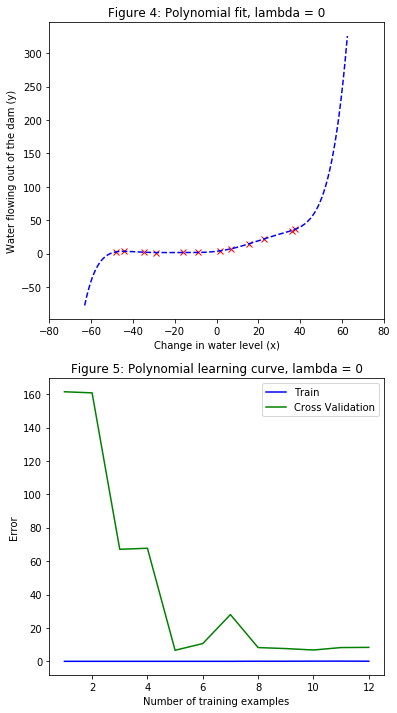

In [15]:
lambda2 = 0
theta2 = trainLinearReg(linearRegCostFunction, X_poly, y, lambda2)
err_train2, err_val2 = learningCurve(X_poly, y, X_poly_val, yval, lambda2)

plt.figure(figsize=(6,12))
plt.subplot(211)
plt.plot(X, y, 'rx')
plotFit(min(X), max(X), mu, sigma, theta2, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlim(-80, 80)
plt.title('Figure 4: Polynomial fit, lambda = 0')

plt.subplot(212)
xax3 = list(range(1, 13))
plt.plot(xax3, err_train2, 'b-', label='Train')
plt.plot(xax3, err_val2, 'g-', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Figure 5: Polynomial learning curve, lambda = 0')
plt.legend(loc='upper right')
plt.show()

### Adjusting the regularization parameter

In [16]:
Lambda1 = 1
theta = trainLinearReg(linearRegCostFunction, X_poly, y, Lambda1)

x2 = np.arange(min(X) - 15, max(X) + 25, 0.05)
x2_poly = polyFeatures(x2, p)
x2_poly = (x2_poly - mu) / sigma
fit_y2 = np.dot(np.c_[np.ones([x2_poly.shape[0],1]), x2_poly], theta2).reshape([-1,1])

err_train2, err_val2 = learningCurve(X_poly, y, X_poly_val, yval, 0)

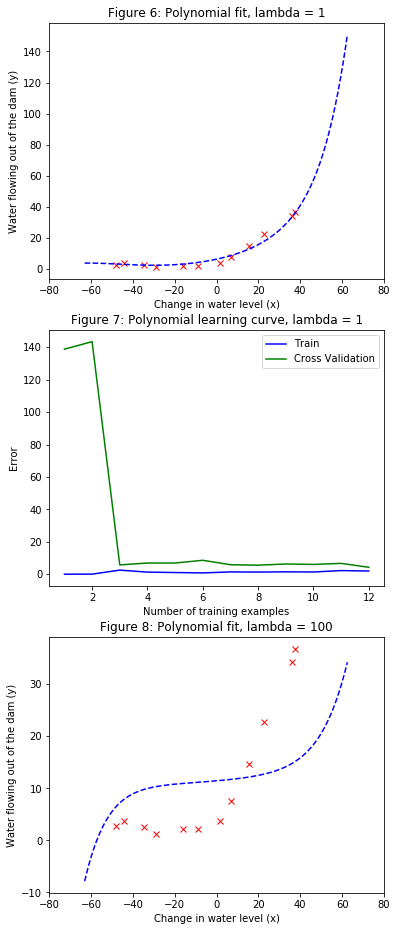

In [17]:
lambda2 = 1
theta2 = trainLinearReg(linearRegCostFunction, X_poly, y, lambda2)
err_train2, err_val2 = learningCurve(X_poly, y, X_poly_val, yval, lambda2)

plt.figure(figsize=(6,16))
plt.subplot(311)
plt.plot(X, y, 'rx')
plotFit(min(X), max(X), mu, sigma, theta2, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlim(-80, 80)
plt.title('Figure 6: Polynomial fit, lambda = 1')

plt.subplot(312)
xax3 = list(range(1, 13))
plt.plot(xax3, err_train2, 'b-', label='Train')
plt.plot(xax3, err_val2, 'g-', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Figure 7: Polynomial learning curve, lambda = 1')
plt.legend(loc='upper right')

lambda3 = 100
theta3 = trainLinearReg(linearRegCostFunction, X_poly, y, lambda3)

plt.subplot(313)
plt.plot(X, y, 'rx')
plotFit(min(X), max(X), mu, sigma, theta3, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlim(-80, 80)
plt.title('Figure 8: Polynomial fit, lambda = 100')
plt.show()

### Selecting lambda using a cross validation set

In [18]:
def validationCurve(x_train, y_train, x_val, y_val, lambdas):
    error_train = []
    error_val = []
    for i in lambdas:
        p = trainLinearReg(linearRegCostFunction, x_train, y_train, i)
        error_train.append(linearRegCostFunction(p, x_train, y_train, 0)[0])
        error_val.append(linearRegCostFunction(p, x_val, y_val, 0)[0])
    best_lambda = lambdas[np.argmin(error_val)]
    return (error_train, error_val, best_lambda)

In [19]:
lambdas1 = [0, 0.0001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
err_train, err_val, best_lambda = validationCurve(X_poly, y, X_poly_val, yval, lambdas1)

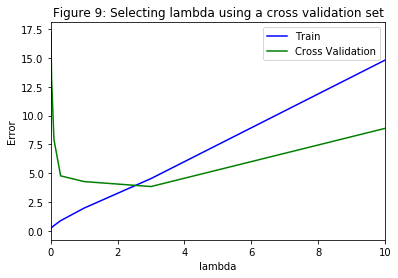

In [20]:
plt.plot(lambdas1, err_train, 'b-', label='Train')
plt.plot(lambdas1, err_val, 'g-', label='Cross Validation')
plt.xlim([0, 10])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.title('Figure 9: Selecting lambda using a cross validation set')
plt.legend(loc='upper right')
plt.show()

### Computing test set error

In [21]:
p = trainLinearReg(linearRegCostFunction, X_poly, y, 3)
test_err = linearRegCostFunction(p, X_poly_test, ytest, 0)[0]
print("Test error with lambda=3: ", test_err)

Test error with lambda=3:  3.57202661948


### Plotting learning curves with randomly selected examples

In [23]:
def randLearningCurve(x_train, y_train, x_val, y_val, repeat, Lambda):
    error_train = []
    error_val = []
    m = x_train.shape[0]
    m_list = np.arange(m)
    for i in range(1, m+1):
        error_train_1 = []
        error_val_1 = []
        for j in range(repeat):
            ind = np.random.choice(m_list, size=i, replace=False)
            p = trainLinearReg(linearRegCostFunction, x_train[ind], y_train[ind], Lambda)
            error_train_1.append(linearRegCostFunction(p, x_train[ind], y_train[ind], 0)[0])
            error_val_1.append(linearRegCostFunction(p, x_val, y_val, 0)[0])
        error_train.append(np.mean(error_train_1))
        error_val.append(np.mean(error_val_1))
    return (error_train, error_val)

In [24]:
err_train, err_val = randLearningCurve(X_poly, y, X_poly_val, yval, 50, 0.01)

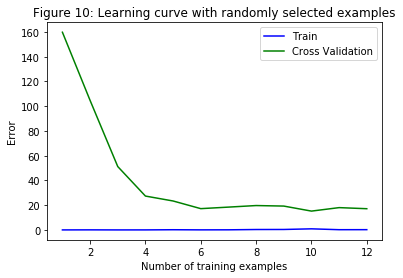

In [25]:
xax3 = list(range(1, 13))
plt.plot(xax3, err_train, 'b-', label='Train')
plt.plot(xax3, err_val, 'g-', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Figure 10: Learning curve with randomly selected examples')
plt.legend(loc='upper right')
plt.show()